<a href="https://colab.research.google.com/github/Abonty18/Numerical-Methods-Lab/blob/main/190042118_Math_4544_A_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2 : False Position and Secant method**<br>

The False Position method is one of the methods of finding roots of a non-linear function. Similar to the Bisection method, it falls under the category of **Bracketing methods** since the initial boundary guesses, x<sub>l</sub> and x<sub>u</sub>, must bracket the actual root. And the assumption here is that the function is real continuous, otherwise the False position method wouldn't work. The main difference between the Bisection method and False position method is that it takes advantage of the fact that one of the boundary values, either x<sub>l</sub> or x<sub>u</sub>, would have their functional value be closer to the zero of the function, and this would result in the new estimation x<sub>r</sub> be closer to one of the bracketing values than the mid-point x<sub>m</sub>.

In today's lab, we will be implementing the False position method in python. Just like in the previous lab for Bisection method, we will be considering the function f(x) as an array of coefficients, for instance if we want to have f(x) = x<sup>3</sup>+x-2, then in python we will create an array as follows:


In [ ]:
f = [0.5,0,-2,5]

Note that your implementation should be able to handle the array f of any size,which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array f given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array f and a point x as input and evaluate the value of the function at that point x using a loop and return that value. This function will be called in the other function that you will implement, which is as follows:
```
falseposition(f, xl, xu, epsilon)
```
This function will return the root of the equation represented by the array f and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute relative approximate error of at most epsilon (%).

##Task 1
Implement the function for False position method following the requirements set earlier. Write a script after the function to call it and test whether it is working correctly. For the function given above, there is only one real root and it is 1.

In [1]:
# Write a function to return the value of the polynomial at the point x
import numpy as np
f = np.array([0.5,0,-2,5])
def func(x,f):
    result=0
    for i in range (len(f)-1,-1,-1):
      result= result+f[len(f)-i-1]*pow(x,i)
    return result
#print(func(1,f))

#Complete the following function

def falseposition(f, x0, x1, epsilon):
  #write your implementation here
    x2=x0
    step = 0
    error=100
    
    print('\n\n*** FALSE POSITION METHOD IMPLEMENTATION ***')
    condition = True
    while condition:
        x_o=x2
        x2 = x0 - (x1-x0) * func(x0,f)/( func(x1,f) - func(x0,f) )
        
        print('Iteration %d, x2 = %0.6f and f(x2) = %0.6f',(step, x2, func(x2,f)))
        print("The value of error is :" , "%.5f" %error)

        if func(x0,f) * func(x2,f) < 0:
            x1 = x2
        else:
            x0 = x2
        if(step!=0):
          error=abs((x2-x_o)/x2)
          if error<=epsilon:
            break

        step = step + 1
        condition = abs(func(x2,f)) > epsilon

        # print('\nRequired root is: %0.8f' % x2)
        # print("The value of error is :" , "%.5f" %error)
falseposition(f,-3,-2,0.01)






*** FALSE POSITION METHOD IMPLEMENTATION ***
Iteration %d, x2 = %0.6f and f(x2) = %0.6f (0, -2.6666666666666665, 0.8518518518518539)
The value of error is : 100.00000
Iteration %d, x2 = %0.6f and f(x2) = %0.6f (1, -2.751381215469613, 0.08864889714407553)
The value of error is : 100.00000
Iteration %d, x2 = %0.6f and f(x2) = %0.6f (2, -2.7598952248751507, 0.008699606789251746)
The value of error is : 0.03079


In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the matplotlib library.

## Task 2
Generate a plot of **iteration vs relative approx error (%)** for the False Position method function you implemented earlier.



*** FALSE POSITION METHOD IMPLEMENTATION ***
[2.6381668946648515, 1.536887690013446, 0.6215737688583304, 0.3835043544294376, 0.2571507880804637, 0.17075628776363674, 0.10884334504393285, 0.0664067601152055, 0.03912890422592796, 0.02251350285649111, 0.012761889621850703]


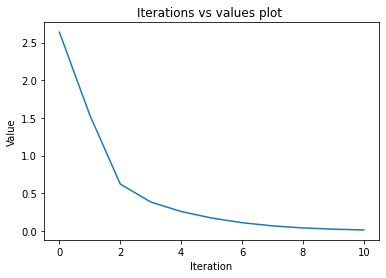

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = np.array([0.5,0,-2,5])
def func(x,f):
    result=0
    for i in range (len(f)-1,-1,-1):
      result= result+f[len(f)-i-1]*pow(x,i)
    return result
#print(func(1,f))

#Complete the following function

def falseposition(f, x0, x1, epsilon):
  #write your implementation here
    x2=x0
    step = 0
    error=1000
    errorlist=[]
    
    print('\n\n*** FALSE POSITION METHOD IMPLEMENTATION ***')
    condition = True
    while condition:
        x_o=x2
        x2 = x0 - (x1-x0) * func(x0,f)/( func(x1,f) - func(x0,f) )
        
        # print('Iteration %d, x2 = %0.6f and f(x2) = %0.6f',(step, x2, func(x2,f)))
        # print("The value of error is :" , "%.5f" %error)

        if func(x0,f) * func(x2,f) < 0:
            x1 = x2
        else:
            x0 = x2
        if(step!=0):
          error=abs((x2-x_o)/x2)
          if error<=epsilon:
            break

        step = step + 1
        if(error<=100):
         errorlist.append(error)
    return errorlist

error=falseposition(f,-5,1,0.01)
print(error)

vals=np.arange(100,200,20)

plt.plot(error)
plt.title("Iterations vs values plot ")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()




# **Secant method**
The Secant method is another method of finding roots of a nonlinear function. Unlike the Bisection and False position method, it falls under the category of **Open methods** due to the fact that we only need two initial guesses that do not have to bracket the actual root. Secant method works by approximating the derivative that is used in **Newton Raphson method**.

## Task 3
Implement the Secant method for the above function and write a script for testing its implementation. The actual root is 1, and you can take the initial guesses for the secant as 2 and 2.2.

In [29]:
# Write a function to return the value of the polynomial at the point x
import numpy as np
f = np.array([0.5,0,-2,5])
def func(x,f):
    result=0
    for i in range (len(f)-1,-1,-1):
      result= result+f[len(f)-i-1]*pow(x,i)
    return result

# Complete the following function
def secant(f,x1, x2, epsilon):
    n = 0; xm = 0; x0 = 0; c = 0;error=100;
    if (func(x1,f) * func(x2,f) < 0):
        while True:
             
            # calculate the intermediate value
            x0 = ((x1 * func(x2,f) - x2 * func(x1,f)) /
                            (func(x2,f) - func(x1,f)));
 
            # check if x0 is root of
            # equation or not
            c = func(x1,f) * func(x0,f);
 
            # update the value of interval
            x1 = x2;
            x2 = x0;
 
            # update number of iteration
            n += 1;
 
            # if x0 is the root of equation
            # then break the loop
            if (c == 0):
                break;
            x_o=xm
            xm = ((x1 * func(x2,f) - x2 * func(x1,f)) /
                            (func(x2,f) - func(x1,f)));
            error=abs((xm-x_o)/xm)

            print('Iteration no , xm , f(xm) and the error is ',(n, x2, func(x2,f),error))
            # print("The value of error is :" , "%.5f" %error)
             
            if(abs(xm - x0) < epsilon):
              
                break;
         
        # print("Root of the given equation =",
        #                        round(x0, 6));
        # print("No. of iterations = ", n);
         
    else:
        print("Can not find a root in ",
                   "the given interval");
 
# initializing the values
x1 = -3;
x2 = -2;
E = 0.01;
secant(f,x1, x2, E);




Iteration no , xm , f(xm) and the error is  (1, -2.6666666666666665, 0.8518518518518539, 1.0)
Iteration no , xm , f(xm) and the error is  (2, -2.803571428571429, -0.4109107370626841, 0.016146901982670537)
Iteration no , xm , f(xm) and the error is  (3, -2.7590217744119454, 0.01692918448053593, 0.0006385083064336544)


## Task 4
Plot the **iteration vs absolute relative approximate error (%)** curves for both False position method and Secant method in the same graph and see which one converges faster.

[1.0, 0.2675315860558402, 0.022144064713945057, 0.0070523657225556]


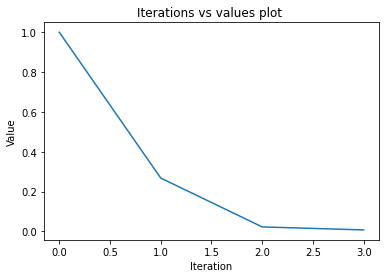

In [30]:
import numpy as np
import matplotlib.pyplot as plt

f = np.array([0.5,0,-2,5])
def func(x,f):
    result=0
    for i in range (len(f)-1,-1,-1):
      result= result+f[len(f)-i-1]*pow(x,i)
    return result

# Complete the following function
def secant(f,x1, x2, epsilon):
    n = 0; xm = 0; x0 = 0; c = 0;error=100;
    errorlist=[]
    if (func(x1,f) * func(x2,f) < 0):
        while True:
             
            # calculate the intermediate value
            x0 = ((x1 * func(x2,f) - x2 * func(x1,f)) /
                            (func(x2,f) - func(x1,f)));
 
            c = func(x1,f) * func(x0,f);
 
            # update the value of interval
            x1 = x2;
            x2 = x0;
 
            # update number of iteration
            n += 1;
 
            if (c == 0):
                break;
            x_o=xm
            xm = ((x1 * func(x2,f) - x2 * func(x1,f)) /
                            (func(x2,f) - func(x1,f)));
            error=abs((xm-x_o)/xm)

            # print('Iteration no , xm , f(xm) and the error is ',(n, x2, func(x2,f),error))
            # print("The value of error is :" , "%.5f" %error)
             
            if(abs(xm - x0) < epsilon):
              
                break;
            if(error<=100):
               errorlist.append(error)
        return errorlist
         
        # print("Root of the given equation =",
        #                        round(x0, 6));
        # print("No. of iterations = ", n);
         
    else:
        print("Can not find a root in ",
                   "the given interval");
 
# initializing the values
x1 = -3;
x2 = 1;
E = 0.01;
secant(f,x1, x2, E);

error=secant(f,-3,-1,0.01)
print(error)

vals=np.arange(100,200,20)

plt.plot(error)
plt.title("Iterations vs values plot ")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()
